# Final Exercice: The Rumos Bank 

The Rumos Bank é um banco que tem perdido bastante dinheiro devido à quantidade de créditos que fornece e que não são pagos dentro do prazo devido. 

    - Por cada cliente que se estima que não irá  pagar dentro do prazo e afinal paga, o banco tem um custo de 1000euros. 

    - Por cada cliente que se prevê como sendo um bom pagador e afinal não paga dentro do prazo, o banco tem um custo de 3000euros.


Vocês, data scientists de topo,  são contratados para ajudar o banco a prever quais os clientes que não irão cumprir os prazos, para que este consiga uma melhor gestão dos fundos.

Conseguem construir um modelo que ajude a detectar previamente e com sucesso os clientes que são maus pagadores?


Dataset: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Variáveis disponíveis:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente foram maus pagadores? E quantos não foram?
    3. Qual o modelo que levou a melhores resultados? Qual a métrica usada para comparar os diferentes modelos?
    4. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para ser mau pagador?
    5. Qual seria o custo que o banco tem sem nenhum modelo?
    6. Qual o custo que o banco passa a tar com o vosso modelo?

Com base na informação dada, podemos definir que:

    True positive - Os maus pagadores são identificados correctamente.
    True negative - Os bons pagadores são identificados correctamente.
    False positive - Um bom pagador é identificado como sendo um mau pagador.
    False negative - Um mau pagador é identificado como sendo um bom pagador.

---

---

### Bibliotecas

---

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import time

### Constantes
---

In [3]:
root_path = '../data/'
seed = 42

In [4]:
df = pd.read_csv(root_path + 'lending_data.csv')

In [4]:
df.shape

(30000, 25)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.ID.nunique()

30000

#### 1. Quantas features estão disponíveis? Quantos clientes?

    - Existem 24 features disponíveis no dataset.
    - Existem 30000 clientes.

Existem missing values?

In [7]:
df.isnull().values.any()

np.False_

Existem o mesmo número de clientes nas duas classes?

In [8]:
df.groupby('default.payment.next.month')['default.payment.next.month'].count()

default.payment.next.month
0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Não! O dataset é altamente desequilibrado.

#### 2. Quantos clientes têm no dataset que efectivamente foram maus pagadores? E quantos não foram?

    - 23,364 foram bons pagadores. 6,636 foram maus pagadores.

Existem features não númericas?

In [9]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Todas as features são númericas.

Vamos retirar o ID do cliente:

In [10]:
df = df.drop('ID', axis = 1)


In [5]:
df = df.sample(frac=0.1, random_state=seed)

In [12]:
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23399,240000.0,2,3,2,35,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8028,110000.0,2,1,2,34,0,0,0,0,0,...,79402.0,80804.0,81024.0,4112.0,3648.0,2800.0,3100.0,3133.0,2800.0,0
22824,290000.0,2,1,2,31,0,0,0,0,0,...,59493.0,67821.0,71546.0,5017.0,4033.0,2828.0,10000.0,5000.0,3000.0,0
23189,100000.0,2,2,1,42,0,0,0,0,0,...,66292.0,67793.0,67182.0,3000.0,4000.0,3000.0,2500.0,3000.0,2500.0,0
26545,200000.0,2,2,1,50,-2,-2,-2,-2,-2,...,359.0,672.0,1620.0,453.0,348.0,359.0,672.0,1620.0,384.0,0
7667,20000.0,1,1,2,28,1,2,-1,0,0,...,20000.0,20000.0,0.0,0.0,20400.0,0.0,0.0,0.0,0.0,0
21457,180000.0,2,2,2,24,0,0,0,0,-1,...,11186.0,23320.0,6666.0,2009.0,2626.0,3000.0,23320.0,1000.0,1000.0,1
28982,240000.0,2,1,2,33,0,0,0,0,0,...,83021.0,78556.0,78495.0,3500.0,4200.0,3600.0,3000.0,3000.0,3000.0,0
20568,20000.0,1,2,2,28,2,2,0,0,0,...,8585.0,8760.0,12000.0,0.0,1202.0,1000.0,175.0,3240.0,0.0,1
5771,300000.0,1,2,1,40,-2,-2,-2,-2,-2,...,2208.0,2475.0,7580.0,4347.0,0.0,2208.0,2475.0,7580.0,0.0,0


Vamos então dividir o dataset em treino e teste:

In [6]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

In [7]:
X_train = train_set.drop(['default.payment.next.month'], axis = 'columns')
y_train = train_set['default.payment.next.month']

X_test = test_set.drop(['default.payment.next.month'], axis = 1)
y_test = test_set['default.payment.next.month']

Normalização:

In [8]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

Antes de iniciar, vamos calcular a baseline, ou seja, o custo que temos sem nenhum modelo.

$$totalCost = 1000∗FP+3000∗FN$$

In [16]:
y_preds_all_bad = np.ones(y_test.shape) 

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 15
Number of False Negatives: 0
Number of False Positives: 45


In [18]:
print('Total Cost:', fp*1000)

Total Cost: 45000


In [19]:
accuracy_score(y_test, y_preds_all_bad)

0.25

Se todos os clientes fossem considerados como maus pagadores, o banco teria um custo de 4,687,000 Euros.

In [20]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 45
Number of True Positives: 0
Number of False Negatives: 15
Number of False Positives: 0


In [21]:
print('Total Cost:', fn*3000)

Total Cost: 45000


In [22]:
accuracy_score(y_test, y_preds_all_good)

0.75

Se todos os clientes fossem considerados bons pagadores, o banco teria um custo de 3,939,000 Euros.

In [76]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp    

In [78]:
def min_cost_threshold(y_test, y_preds,title):
    costs = {}

    for threshold in np.arange(0, 1.1, 0.1):
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold=threshold)

    # Obter threshold e custo mínimo
    min_threshold = min(costs, key=costs.get)
    min_cost = costs[min_threshold]


    plt.plot(list(costs.keys()),list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    if title:
        plt.title(title)
    plt.grid(True)
    plt.show()

    return min_threshold, min_cost

In [ ]:
def plot_training_time(resource_usage, title="Tempo de Treino por Modelo"):
    """
    Gráfico de barras com o tempo de treino de cada modelo

    Parâmetros:
    - resource_usage: Lista de dicionários com 'model' e 'training_time'.
    - title (opcional): Título do gráfico.

    Retorna:
    - Gráfico de barras.
    """
    df = pd.DataFrame(resource_usage)
    df = df.sort_values(by='training_time', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['model'], df['training_time'])

    # Adicionar valores em cima das barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom',
                 fontsize=12, color='black', fontweight='bold')

    plt.title(title)
    plt.ylabel("Tempo (segundos)")
    plt.xlabel("Modelo")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#### Avaliação Modelos Machine Learning

---

In [125]:
models_and_params = [

    ("logistic_regression",
     Pipeline([
         ("Classifier", LogisticRegression(max_iter=500, solver='lbfgs', random_state=seed, class_weight='balanced'))
     ]),
     {
         "Classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]
     }),

    ("knn",
     Pipeline([
         ("Classifier", KNeighborsClassifier())
     ]),
     {
         "Classifier__n_neighbors": list(range(1, 10))
     }),

    ("svc",
     Pipeline([
         ("Classifier", SVC(random_state=seed, class_weight='balanced', gamma='scale', probability=True, verbose=True))
     ]),
     {
         "Classifier__C": [0.1, 1, 10],
         "Classifier__kernel": ['rbf', 'linear']
     }),

    ("decision_tree",
     Pipeline([
         ("Classifier", tree.DecisionTreeClassifier(random_state=seed, class_weight='balanced'))
     ]),
     {
         "Classifier__max_depth": [3, 6],
         "Classifier__min_samples_split": [2, 4, 10]
     }),

    ("random_forest",
     Pipeline([
         ("Classifier", RandomForestClassifier(random_state=seed, class_weight='balanced'))
     ]),
     {
         "Classifier__n_estimators": [10, 100, 300, 1000]
     }),

    ("mlp",
     Pipeline([
         ("Classifier", MLPClassifier(solver='lbfgs', random_state=seed, max_iter=1000))
     ]),
     {
         "Classifier__hidden_layer_sizes": [(20,), (20, 10), (20, 10, 2)],
         "Classifier__learning_rate_init": [0.0001, 0.001, 0.01, 0.1]
     }),
]

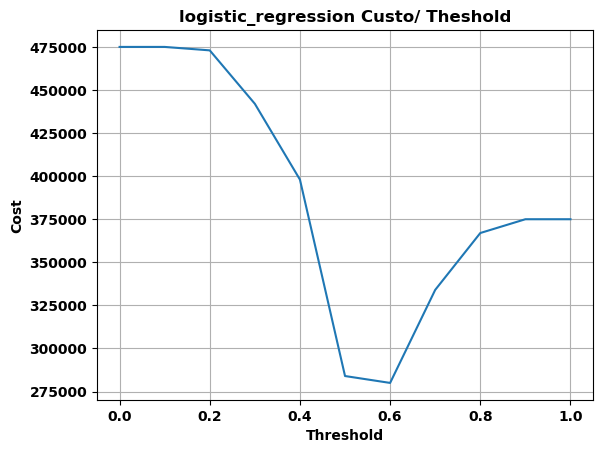

MinCost: (np.float64(0.6), np.int64(280000))
Finalizado: logistic_regression  | Accuracy: 0.6800


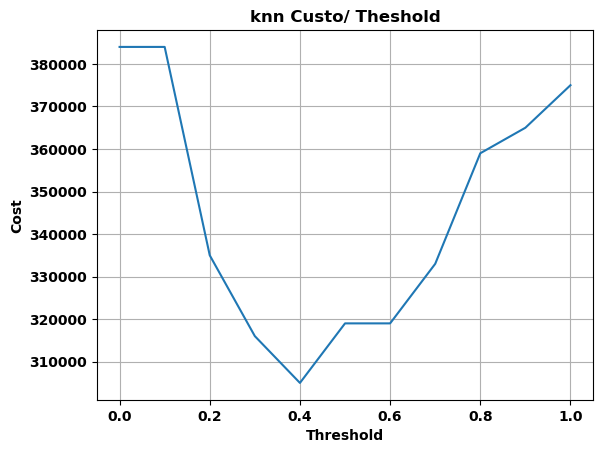

MinCost: (np.float64(0.4), np.int64(305000))
Finalizado: knn  | Accuracy: 0.7950
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

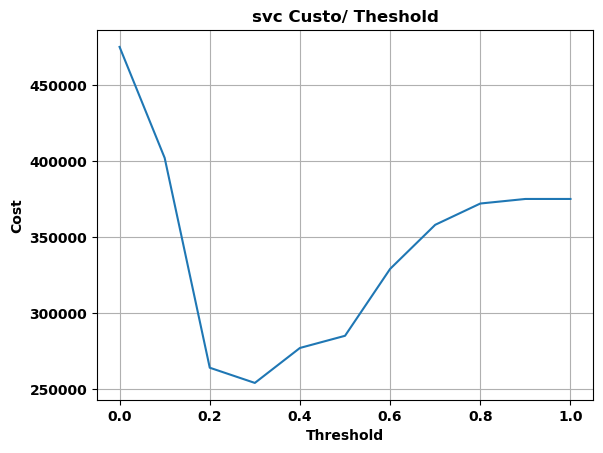

MinCost: (np.float64(0.3), np.int64(254000))
Finalizado: svc  | Accuracy: 0.8167


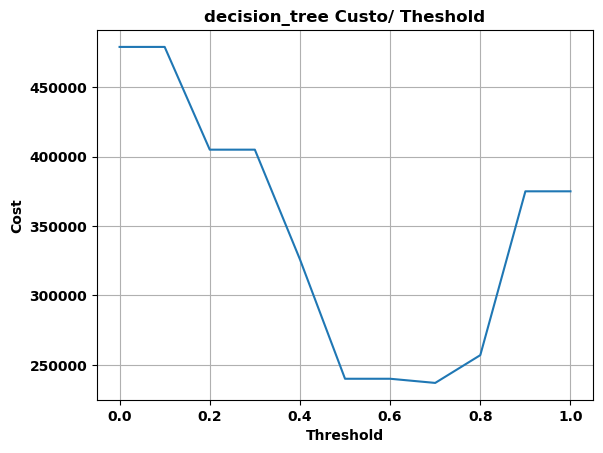

MinCost: (np.float64(0.7), np.int64(237000))
Finalizado: decision_tree  | Accuracy: 0.7700


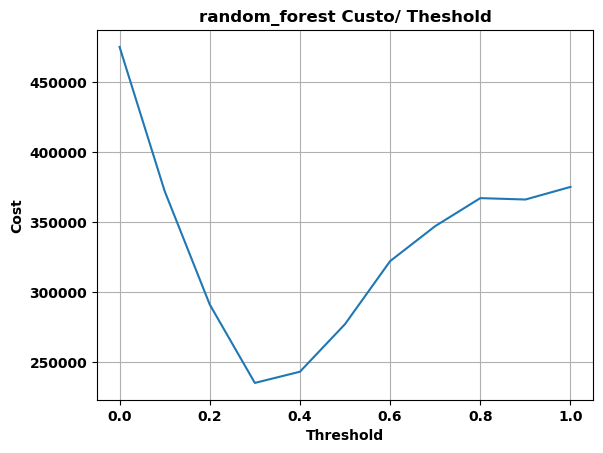

MinCost: (np.float64(0.3), np.int64(235000))
Finalizado: random_forest  | Accuracy: 0.8167


c:\Users\PereiraRodrigues\miniconda3\envs\rumos_bank_lending\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\PereiraRodrigues\miniconda3\envs\rumos_bank_lending\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\PereiraRodrigues\miniconda3\envs\rumos_bank_lending\Lib\site-packages\sklearn\neural_network\_m

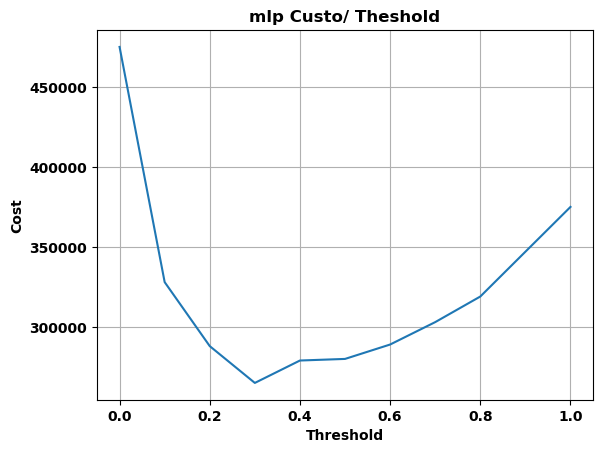

MinCost: (np.float64(0.3), np.int64(265000))
Finalizado: mlp  | Accuracy: 0.7833


In [126]:
# Iterar Pipeline definino ponto anterior, calcular acuracy e registar consumo de recursos
resource_usage = []
for model_name, pipeline, param_grid in models_and_params:

    
    # Medir tempo de treino
    start_time = time.time()

    # === Hiperparam tuning ===
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    # === Previsões e métrica
    y_preds = best_model.predict_proba(X_test)[:, 1]
    
    min_threshold, min_cost = min_cost_threshold(y_test, y_preds, model_name+' Custo/ Theshold')
    print(f"MinCost: {min_threshold,min_cost}")


    # Converter probabilidades em classes
    y_preds_class = (y_preds >= 0.5).astype(int)  
    
    # Calcular Accuracy
    acc = accuracy_score(y_test, y_preds_class)

    # === Log dos melhores parâmetros
    best_params = search.best_params_
    print(f"Finalizado: {model_name}  | Accuracy: {acc:.4f}")

    end_time = time.time()
    elapsed_time = end_time - start_time

    resource_usage.append({
    "model": model_name,
    "training_time": elapsed_time
    })

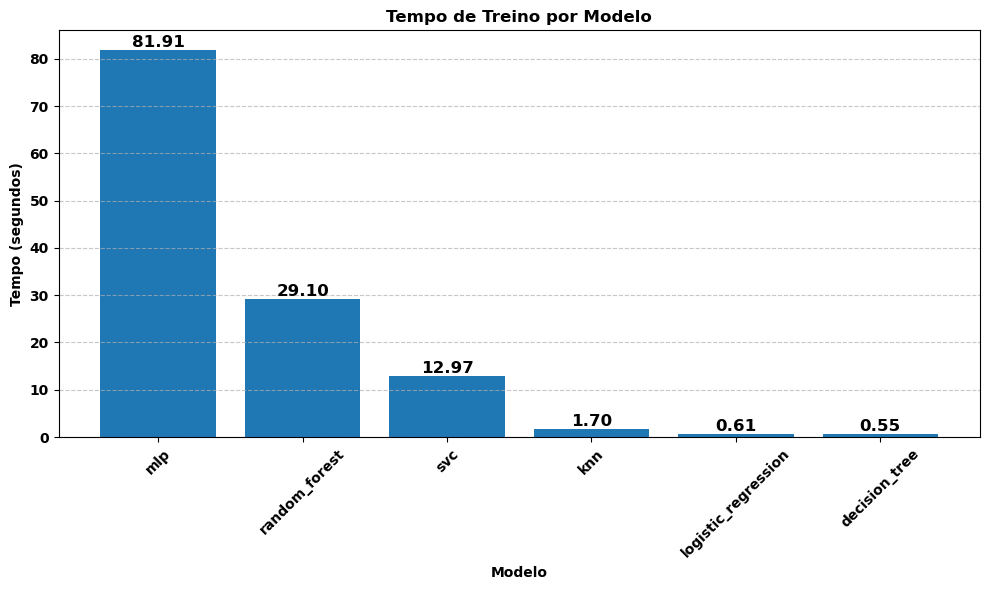

In [94]:
plot_training_time(resource_usage)

#### 3. Qual o modelo que levou a melhores resultados? Qual a métrica usada para comparar os diferentes modelos?

- A métrica usada foi o custo total uma vez que o objetivo do modelo era diminuir os custos do banco. O Modelo que levou a melhores resultados foram as neural networks e as random forests - 2,467,000 de custo.  
- Visto que com as neural networks não consigo saber qual a importancia das features, vou eleger o modelo de random forests como a solução final. Para além disso o treino das neural networks demorou quase o dobro do tempo.

#### 4. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para ser mau pagador?

In [112]:
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)
parameters = {'n_estimators':[10, 100, 300, 1000]}
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

In [113]:
rf = RandomForestClassifier(**clf_rf.best_params_).fit(X_train, y_train)

In [114]:
important_features = pd.DataFrame(data = rf.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
PAY_0,0.092557
ID,0.069201
AGE,0.059717
BILL_AMT1,0.053849
LIMIT_BAL,0.052634
PAY_AMT1,0.049538
BILL_AMT2,0.048874
BILL_AMT3,0.048822
PAY_AMT2,0.047957
BILL_AMT4,0.047343


As variaveis que mais contribuem para o modelo decidir se um cliente vai ser um bom ou mau pagador são:
    - PAY_0 - Repayment status in September, 2005 
    - e AGE - idade do cliente
    

#### 5. Qual seria o custo que o banco tem sem nenhum modelo?

    - O custo que o banco teria sem modelo, ou seja, assumindo que todos os clientes seriam bons pagadores, é de: 3,939,000 Euros.

#### 6. Qual o custo que o banco passa a tar com o vosso modelo?

- O custo que o banco teria com o modelo seria de: 2,476,000 Euros - Pouparia quase 1 Milhão e meio de Euros!